# Strings

### *Author:* Grady Cooke
### *Date:* June 14, 2025

## Summary

This notebook explores string manipulation and analysis through a variety of custom Python functions. It includes tools for reversing strings, checking for palindromes and anagrams, counting vowels and consonants, analyzing character types, identifying the most common letters or characters, and detecting repeating substrings. The notebook also visualizes string patterns with functions that generate bigram heatmaps and letter frequency bar plots. 

In [3]:
# imports
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

## String Functions

### Reverse a string

In [6]:
def reverse_string(s):
    return s[::-1]

### Normalize a string (remove spaces, punctuation, and case)

In [8]:
def normalize_string(s):
    return re.sub(r'[^a-z0-9]', '', s.lower())

### Test if a string is a palindrome (disregarding spaces, punctuation, and case)

In [10]:
def is_palindrome(s):
    normalized = normalize_string(s)
    return normalized == normalized[::-1]

### Check if two strings are anagrams

In [12]:
def are_anagrams(s1, s2):
    return sorted(normalize_string(s1)) == sorted(normalize_string(s2))

### Count the vowels and consonants in a string

In [14]:
def is_vowel(char):
    return char.lower() in 'aeiou'

def count_vowels_and_consonants(s):
    counts = {'vowels': 0, 'consonants': 0}
    for char in s.lower():
        if char.isalpha():
            if is_vowel(char):
                counts['vowels'] += 1
            else:
                counts['consonants'] += 1
    return counts

### Find the most common character and find the most common letter in a string

In [16]:
def most_common_char(s):
    s = s.lower()
    if not s:
        return None
    counter = Counter(s)
    max_count = max(counter.values())
    most_common = [char for char, count in counter.items() if count == max_count]
    return most_common if len(most_common) > 1 else most_common[0]

In [17]:
def most_common_letter(s):
    s = normalize_string(s)
    if not s:
        return None
    counter = Counter(s)
    max_count = max(counter.values())
    most_common = [char for char, count in counter.items() if count == max_count]
    return most_common if len(most_common) > 1 else most_common[0]

### Find the longest word in a string

In [19]:
 """
    clean_for_word_analysis(s) converts the string to lowercase and replaces punctuation with spaces,
    retaining only alphanumeric characters and whitespace.
"""
def clean_for_word_analysis(s):
    return ''.join(c.lower() if c.isalnum() or c.isspace() else ' ' for c in s)

def longest_word(sentence):
    cleaned = clean_for_word_analysis(sentence)
    words = cleaned.split()
    return max(words, key=len) if words else None

### Check if a string is a pangram (all 26 letters are present)

In [21]:
def is_pangram(sentence):
    normalized = normalize_string(sentence)
    return set("abcdefghijklmnopqrstuvwxyz").issubset(set(normalized))

### In a string, determine the counts of uppercase letters, lowercase letters, digits, punctuation, and whitespaces

In [23]:
def analyze_char_types(s):

    result = {
        'uppercase': 0,
        'lowercase': 0,
        'digits': 0,
        'punctuation': 0,
        'whitespace': 0
    }

    for char in s:
        if char.isupper():
            result['uppercase'] += 1
        elif char.islower():
            result['lowercase'] += 1
        elif char.isdigit():
            result['digits'] += 1
        elif char.isspace():
            result['whitespace'] += 1
        else:
            result['punctuation'] += 1

    return result

## Testing Functions

In [25]:
reverse_string("desserts")

'stressed'

In [26]:
normalize_string("Hello World!")

'helloworld'

In [27]:
is_palindrome("A man, a plan, a canal — Panama.")

True

In [28]:
are_anagrams("Dormitory","Dirty Room")

True

In [29]:
count_vowels_and_consonants("I think, therefore I am.")

{'vowels': 8, 'consonants': 10}

In [30]:
most_common_char("...,,,,##&&&*****(((((())))))aaa")

['(', ')']

In [31]:
most_common_letter("""When, in the course of human events, it becomes necessary for one 
people to dissolve the political bands which have connected them with another, and to assume, 
among the powers of the earth, the separate and equal station to which the laws of nature and of nature's God entitle them, 
a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation.""")

'e'

In [32]:
longest_word("The mitochondria is the powerhouse of the cell.")

'mitochondria'

In [33]:
is_pangram("The quick brown fox jumps over the lazy dog")

True

In [34]:
analyze_char_types("""It was a bright cold day in April, and the clocks were striking
thirteen. Winston Smith, his chin nuzzled into his breast in an
effort to escape the vile wind, slipped quickly through the glass
doors of Victory Mansions, though not quickly enough to prevent
a swirl of gritty dust from entering along with him.""")

{'uppercase': 6,
 'lowercase': 244,
 'digits': 0,
 'punctuation': 6,
 'whitespace': 54}

## String Visualizations

### Letter Frequency Plot

The function generates a bar plot showing how frequently each letter of the alphabet appears in a given text. It first filters the input string to include only lowercase alphabetic characters, then counts the occurrences of each letter. The function constructs a bar plot where each bar represents a letter, with its height corresponding to its frequency in the text. Vowels are visually distinguished using a different color, and each bar is labeled with the exact count above it for clarity. 

In [38]:
def plot_letter_frequency(text):
    # Only keep alphabetic letters
    letters_only = ''.join(c for c in text.lower() if c.isalpha())
    counts = Counter(letters_only)

    # Create DataFrame
    alphabet = list("abcdefghijklmnopqrstuvwxyz")
    data = pd.DataFrame({
        'letter': alphabet,
        'count': [counts.get(char, 0) for char in alphabet]
    })

    total = data['count'].sum()
    data['percentage'] = data['count'] / total * 100

    # Add color mapping (vowel vs consonant)
    vowels = set("aeiou")
    data['color'] = data['letter'].apply(lambda c: 'skyblue' if c in vowels else 'lightgray')

    # Identify most and least frequent
    max_letter = data.loc[data['count'].idxmax()]
    min_letter = data.loc[data['count'].idxmin()]

    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(data['letter'], data['count'], color=data['color'], edgecolor='black')

    # Annotate each bar with its count
    for bar, count in zip(bars, data['count']):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(count),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

    plt.title("Letter Frequency Bar Plot")
    plt.xlabel("Letter")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

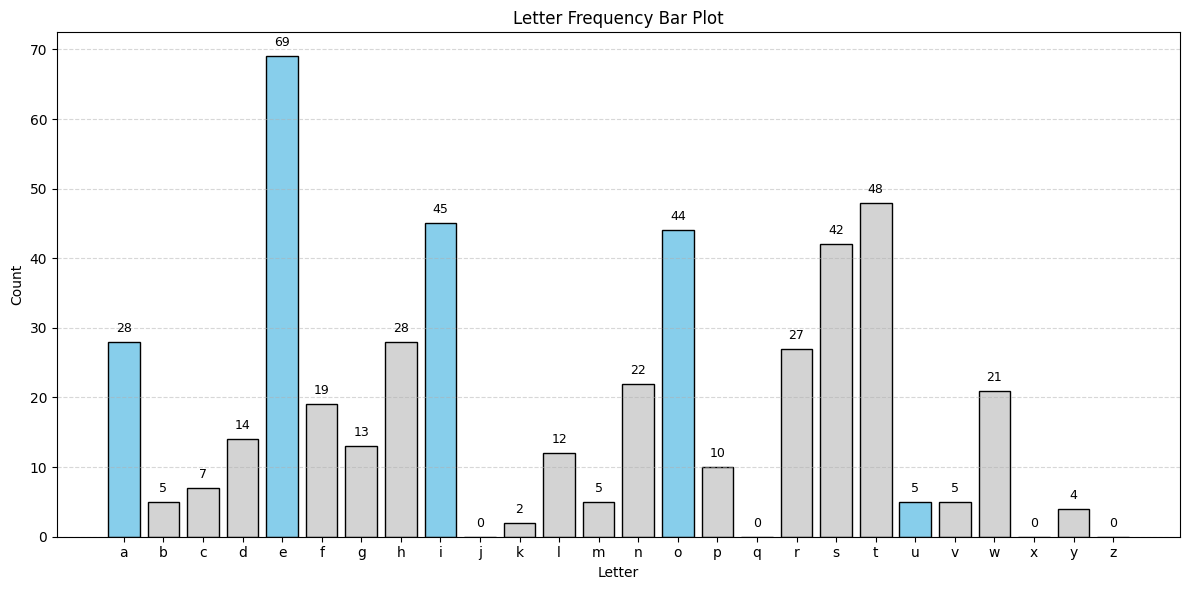

In [39]:
plot_letter_frequency("""It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, 
it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, 
we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.""")

### Bigram Heatmap

The function generates a visual heatmap showing how frequently each letter of the alphabet is followed by another letter within a given string. It first normalizes the input by converting all characters to lowercase and removing anything that isn’t a letter. Then, it constructs a frequency matrix of letter-to-letter transitions (bigrams), optionally normalizes these frequencies, and uses a heatmap to highlight common patterns in letter adjacency. 

In [42]:
def bigram_heatmap(s, normalize=True, plot=True):
    s = ''.join(c.lower() for c in s if c.isalpha())
    bigrams = [(s[i], s[i + 1]) for i in range(len(s) - 1)]

    df = pd.DataFrame(bigrams, columns=['first', 'second'])
    matrix = df.pivot_table(index='first', columns='second', aggfunc=len, fill_value=0)

    if normalize:
        matrix = matrix.div(matrix.sum(axis=1), axis=0)  # Normalize by row

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(matrix, cmap="Blues", linewidths=0.5)
        plt.title("Bigram Heatmap (Normalized)" if normalize else "Bigram Heatmap")
        plt.xlabel("Next Letter")
        plt.ylabel("Current Letter")
        plt.show()

 #   return matrix

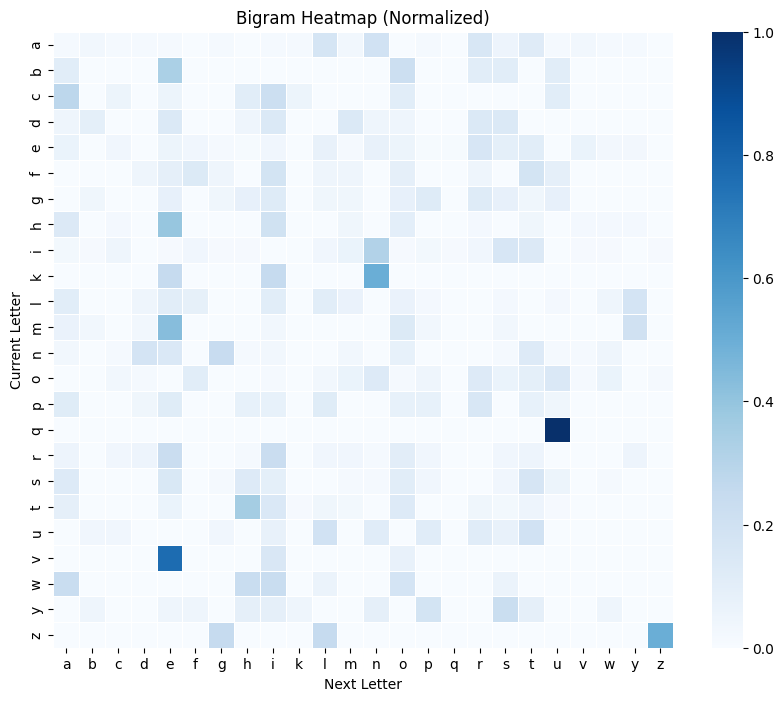

In [43]:
bigram_heatmap("""Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, 
and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. 
It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; 
whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, 
and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, 
that it requires a strong moral principle to prevent me from deliberately stepping into the street, 
and methodically knocking people’s hats off—then, I account it high time tozz get to sea as soon as I can. 
This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; 
I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost all men in their degree, 
some time or other, cherish very nearly the same feelings towards the ocean with me.""")